In [ ]:
import numpy as np
import pandas as pd


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Data Preparation**

Gi zemame podatocite od data setot,vaka mora bidejki imame vo nekoi od kolonite znaci,specijalni simboli.

In [ ]:
data = pd.read_csv(
    "/content/US_youtube_trending_data.csv",
    encoding='utf-8',
    on_bad_lines='skip',
    engine='python'
)

Da gi vidam kakvi koloni imam kako izgledaat i slicno

In [ ]:
data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4856 entries, 0 to 4855
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           4856 non-null   object
 1   title              4856 non-null   object
 2   publishedAt        4856 non-null   object
 3   channelId          4856 non-null   object
 4   channelTitle       4856 non-null   object
 5   categoryId         4856 non-null   int64 
 6   trending_date      4856 non-null   object
 7   tags               4856 non-null   object
 8   view_count         4856 non-null   int64 
 9   likes              4856 non-null   int64 
 10  dislikes           4856 non-null   int64 
 11  comment_count      4856 non-null   int64 
 12  thumbnail_link     4856 non-null   object
 13  comments_disabled  4856 non-null   bool  
 14  ratings_disabled   4856 non-null   bool  
 15  description        4827 non-null   object
dtypes: bool(2), int64(5), object(9)
memory usa

Dokolku nekoja kolona ima prazni vrednosti

In [ ]:
data.isnull().sum()

,0
video_id,0
title,0
publishedAt,0
channelId,0
channelTitle,0
categoryId,0
trending_date,0
tags,0
view_count,0
likes,0


In [ ]:
print(data.duplicated().sum())

1


Gi trgam videata koi se duplikati.

In [ ]:
data = data.drop_duplicates(subset='video_id', keep='first')

Gi brise redovite kade shto description ima NaN vrednost(prazna).

In [ ]:
data = data.dropna(subset=['description'])

Grupiranje spored ime na kanal,kolku videa ima i vkupniot broj na pregledi.Potoa se sortiraaat spored vkupniot broj na pregledi,od najmnogu odnosno od najpopularen kanal,kon najmalce popularen.

In [ ]:
popular_channels = data.groupby('channelTitle').agg({
    'video_id': 'count',
    'view_count': 'sum',
}).sort_values(by='view_count', ascending=False).reset_index()

Ke gi obrabotuvam prvite 10 koi se najpopularni kanali.

In [ ]:
top_channels = popular_channels.head(10)['channelTitle'].tolist()

Pravi filtiriranje,odnosno gi zema samo videata od ovie 10 kanali.

In [ ]:
top_10_channel_videos = data[data['channelTitle'].isin(top_channels)]

In [ ]:
top_10_channel_videos

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
19,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,5999732,714287,15174,31039,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...
23,p7HGUZWq_8s,Doing Doja Cat’s Makeup!!,2020-08-11T19:00:09Z,UCucot-Zp428OwkyRm2I7v2Q,James Charles,24,2020-08-12T00:00:00Z,james|james charles|makeup artist|covergirl|co...,3662673,394675,5757,27346,https://i.ytimg.com/vi/p7HGUZWq_8s/default.jpg,False,False,HI SISTERS! Today’s video is a collaboration w...
37,5V2B28OqfqM,"I Spent $1,000,000 On Lottery Tickets and WON",2020-08-08T20:00:02Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2020-08-12T00:00:00Z,[None],21022916,1297679,22626,76814,https://i.ytimg.com/vi/5V2B28OqfqM/default.jpg,False,False,I didnt think i was going to win that much... ...
45,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353329,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...
47,Aur7UgTGlL0,TRAIL BLAZERS at MAVERICKS | FULL GAME HIGHLIG...,2020-08-12T01:27:17Z,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,2020-08-12T00:00:00Z,NBA|G League|Basketball|game-0021901300|Jump S...,937569,10160,405,3119,https://i.ytimg.com/vi/Aur7UgTGlL0/default.jpg,False,False,TRAIL BLAZERS at MAVERICKS | FULL GAME HIGHLIG...
51,hsm4poTWjMs,Cardi B - WAP feat. Megan Thee Stallion [Offic...,2020-08-07T04:00:10Z,UCxMAbVFmxKUVGAll0WVGpFw,Cardi B,10,2020-08-12T00:00:00Z,Cardi B|Cardi|Atlantic Records|rap|hip hop|tra...,76805026,2820345,382578,270263,https://i.ytimg.com/vi/hsm4poTWjMs/default.jpg,False,False,Cardi B - WAP feat. Megan Thee StallionStream/...
68,PHYtv0v2DeA,NUGGETS at LAKERS | FULL GAME HIGHLIGHTS | Aug...,2020-08-11T03:53:08Z,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,2020-08-12T00:00:00Z,NBA|G League|Basketball|game-0021901296|Jump S...,2103682,22243,907,3946,https://i.ytimg.com/vi/PHYtv0v2DeA/default.jpg,False,False,NUGGETS at LAKERS | FULL GAME HIGHLIGHTS | Aug...
118,4OCcbUZuTUQ,TREASURE – ‘BOY’ 0809 SBS Inkigayo,2020-08-09T08:16:23Z,UCx9hXYOCvUYwrprEqe4ZQHA,TREASURE (트레저),24,2020-08-12T00:00:00Z,YG Entertainment|YG|와이지|K-pop|트레져|트레저|TREASURE...,2294232,343224,2176,26560,https://i.ytimg.com/vi/4OCcbUZuTUQ/default.jpg,False,False,"Copyrightⓒ2020 SBS Contents Hub Co., Ltd. & YG..."
128,QsUfsZzxi9c,"Whatever You Build, I'll Pay For!",2020-08-06T17:00:23Z,UCIPPMRA040LQr5QPyJEbmXA,MrBeast Gaming,20,2020-08-12T00:00:00Z,[None],13073796,1643982,16286,97749,https://i.ytimg.com/vi/QsUfsZzxi9c/default.jpg,False,False,We have a giant area of land and whatever you ...
154,hT3pPAdnlfA,LAKERS at PACERS | FULL GAME HIGHLIGHTS | Augu...,2020-08-09T00:36:26Z,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,2020-08-12T00:00:00Z,NBA|G League|Basketball|game-0021901282|Jump S...,1296538,9285,672,3279,https://i.ytimg.com/vi/hT3pPAdnlfA/default.jpg,False,False,LAKERS at PACERS | FULL GAME HIGHLIGHTS | Augu...


**Visualization**-broj na videa,broj na pregledi

Gi prikazuva kanalite so broj na videa,vo redosledot na top_channels,odnosno spored najpopularen kanal do najmalce popularen.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


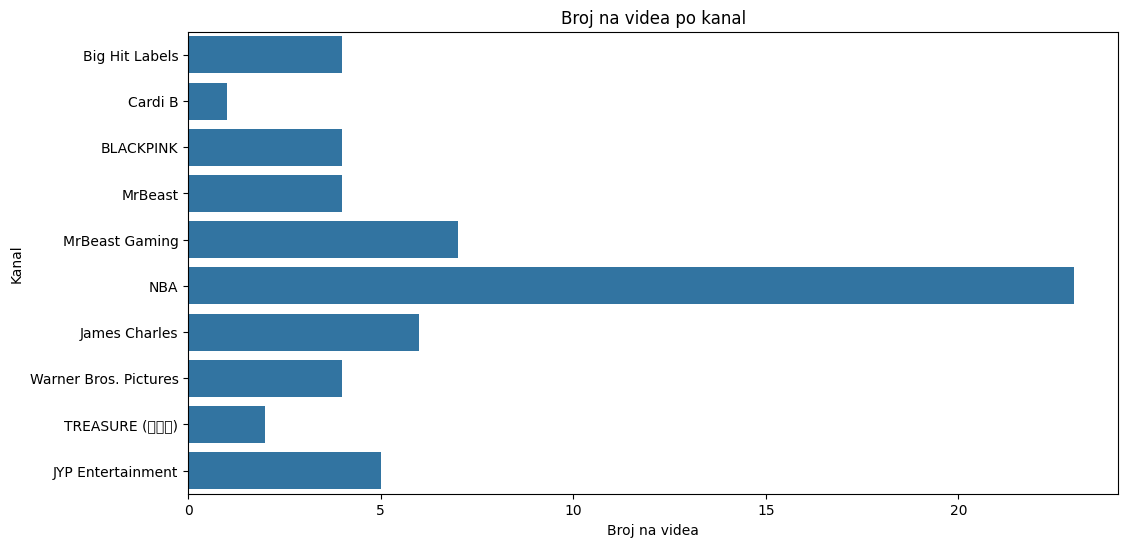

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=top_10_channel_videos, y='channelTitle', order=top_channels)
plt.title("Broj na videa po kanal")
plt.xlabel("Broj na videa")
plt.ylabel("Kanal")
plt.show()

Gi prikazuva kanalite so nivnite pregledi,odnosno gi zema site videa od top 10 kanali,gi grupira spored imeto na kanalot i potoa spored kolku views imaat gi presmetuva vkupno.Redoslednot go dobivaat isto kako i gore od top_channels spored koj e najpopularen

Text(0, 0.5, 'Kanal')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: User

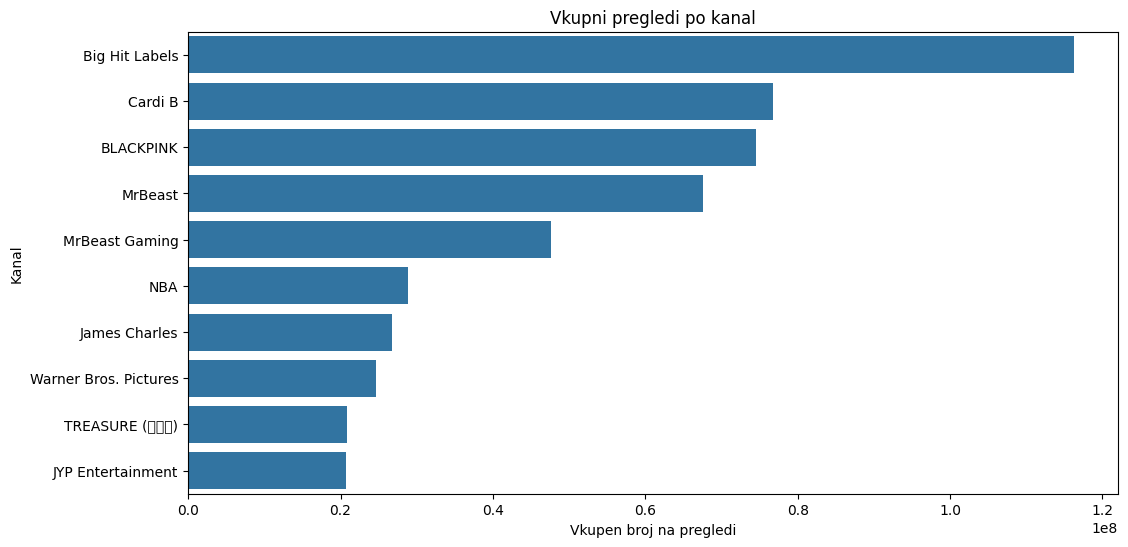

In [ ]:
views_per_channel = top_10_channel_videos.groupby('channelTitle')['view_count'].sum().reindex(top_channels)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=views_per_channel.values, y=views_per_channel.index)

plt.title("Vkupni pregledi po kanal")
plt.xlabel("Vkupen broj na pregledi")
plt.ylabel("Kanal")

**Content analysis**

In [ ]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Spored title,tags i description gi zemam site videa i gi stavam vo klasteri so sho ke se prikaze koj so koj videa se slicni vo kanalite.

SentenceTransformer-gi pretvora recenici i tekst,vo vektori.Se dobiva celokupen tekst,za sekoe video.

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

top_10_channel_videos = top_10_channel_videos.reset_index(drop=True)

top_10_channel_videos.loc[:, 'full_text'] = top_10_channel_videos['title'] + ' ' + top_10_channel_videos['tags'] + ' ' + top_10_channel_videos['description']

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(top_10_channel_videos['full_text'], show_progress_bar=True)

kmeans = KMeans(n_clusters=5, random_state=42)
top_10_channel_videos.loc[:, 'cluster'] = kmeans.fit_predict(embeddings)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Za vizualizacijata znaci deka gi grupira klasterite spored slicnost na videata od kanalite,odnosno spored title,tags i descr.


<ipython-input-18-4189383568>:10: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-4189383568>:10: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-4189383568>:10: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(b

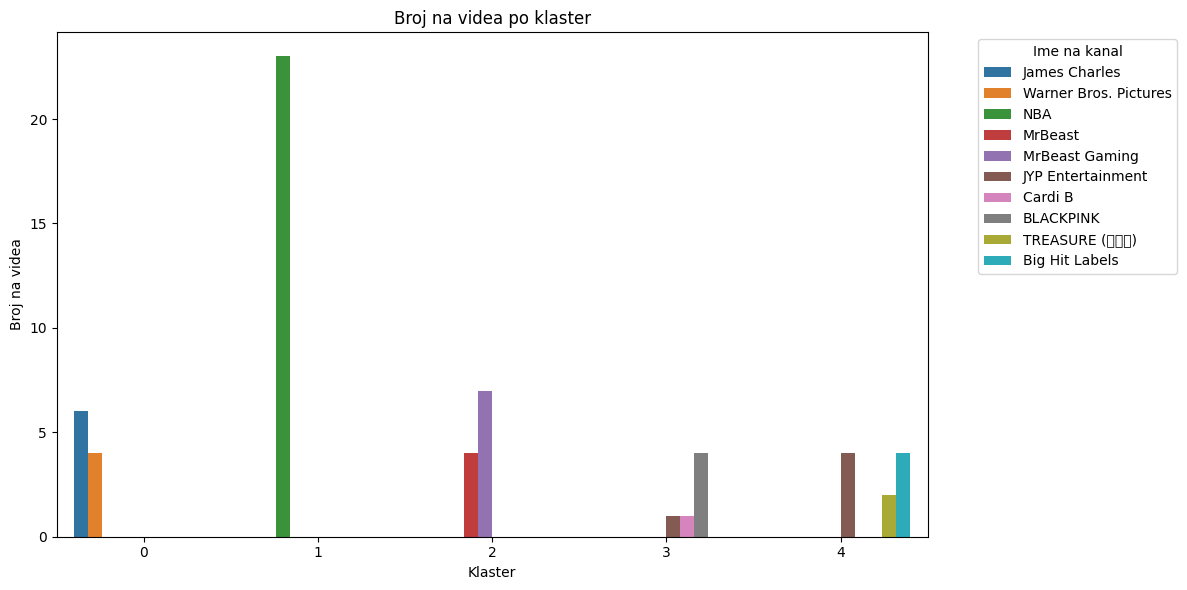

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=top_10_channel_videos, x='cluster', hue='channelTitle', palette='tab10')
plt.title('Broj na videa po klaster')
plt.xlabel('Klaster')
plt.ylabel('Broj na videa')
plt.legend(title='Ime na kanal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Klucni zborovi vo sekoj klaster

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vektorizer = TfidfVectorizer(stop_words='english', max_features=1000)

tfidf_matrica = vektorizer.fit_transform(top_10_channel_videos['full_text'])

zborovi = vektorizer.get_feature_names_out()

for klaster_id in sorted(top_10_channel_videos['cluster'].unique()):
    indeksi_vo_klaster = top_10_channel_videos[top_10_channel_videos['cluster'] == klaster_id].index
    prosechen_tfidf = tfidf_matrica[indeksi_vo_klaster].mean(axis=0)
    top_indeksi = np.argsort(prosechen_tfidf.A1)[-10:][::-1]
    top_zborovi = [zborovi[i] for i in top_indeksi]

    print(f"\n🔹 Najchesti zborovi vo klaster {klaster_id}:")
    print(", ".join(top_zborovi))


🔹 Najchesti zborovi vo klaster 0:
makeup, http, com, james, beauty, hacks, charles, sisters, apparel, tok

🔹 Najchesti zborovi vo klaster 1:
nba, game, highlights, pts, lakers, august, reb, rockets, https, thunder

🔹 Najchesti zborovi vo klaster 2:
https, com, discord, www, facebook, twitter, instagram, 000, mrbeast, ll

🔹 Najchesti zborovi vo klaster 3:
cream, ice, blackpink, 블랙핑크, gomez, selena, yg, park, cardi, http

🔹 Najchesti zborovi vo klaster 4:
itzy, kim, lee, 있지, shy, com, bts, treasure, www, oh


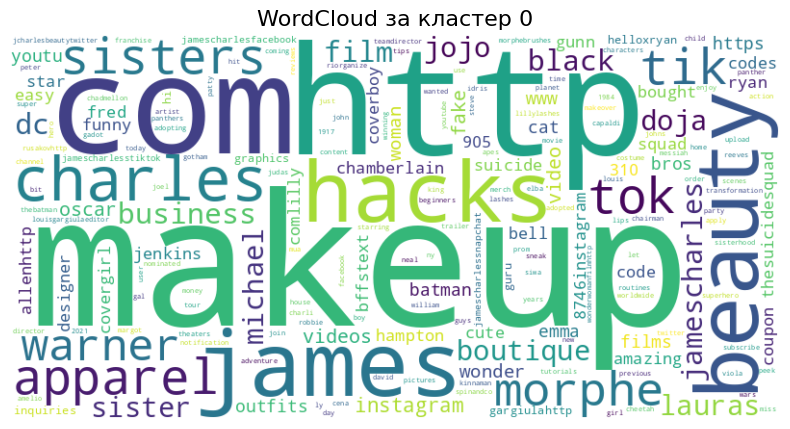

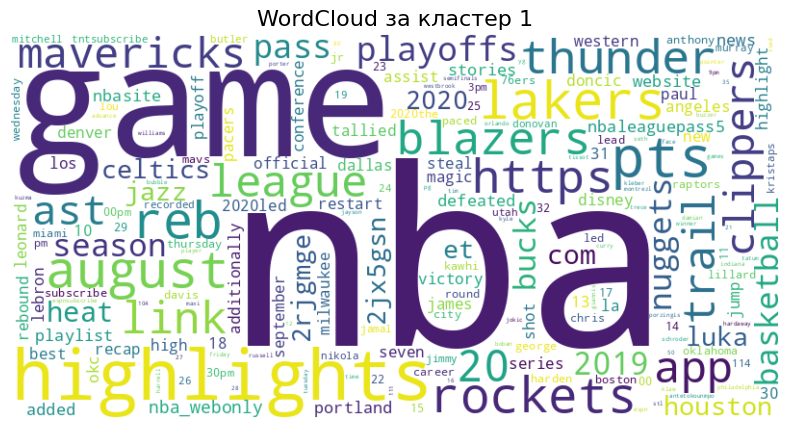

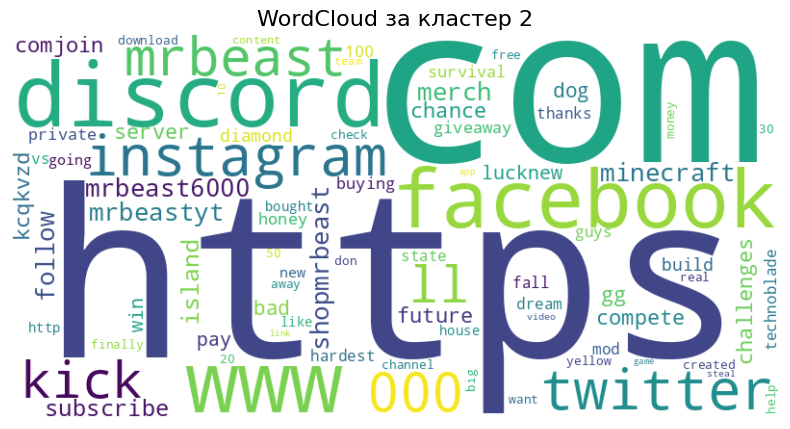

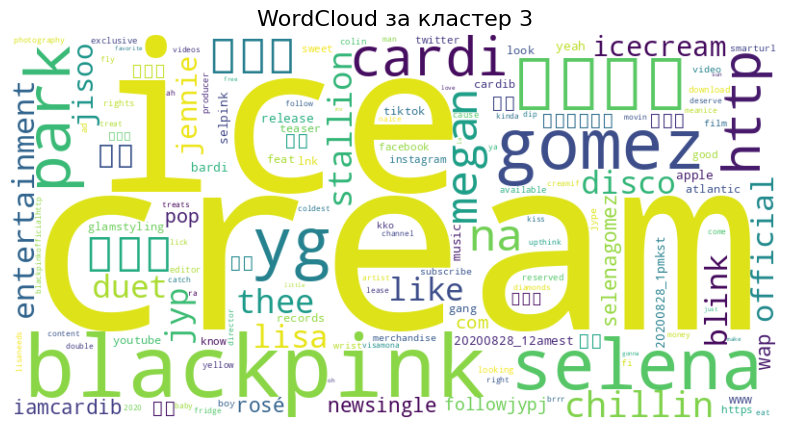

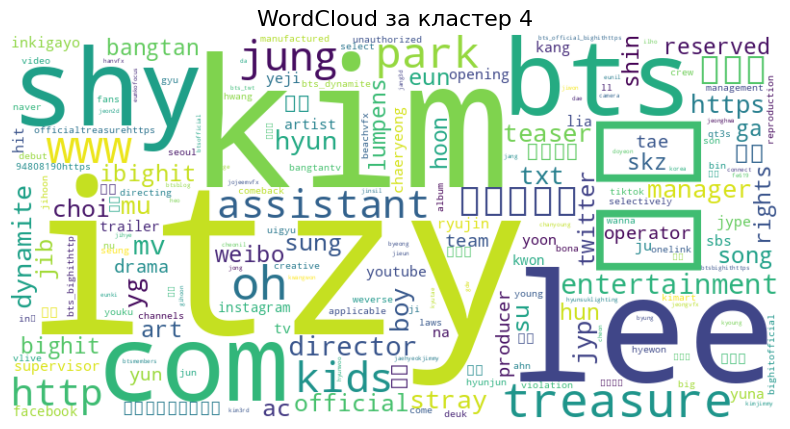

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

def plot_wordcloud(tfidf_vector, feature_names, title):
    word_freq = {feature_names[i]: tfidf_vector[0, i] for i in range(tfidf_vector.shape[1])}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

for cluster in sorted(top_10_channel_videos['cluster'].unique()):
    cluster_indices = top_10_channel_videos[top_10_channel_videos['cluster'] == cluster].index
    cluster_tfidf = tfidf_matrica[cluster_indices].mean(axis=0)
    plot_wordcloud(cluster_tfidf,zborovi, f'WordCloud за кластер {cluster}')

In [ ]:
!pip install transformers
!pip install torch

**Sentiment Analysis**

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def get_sentiment(text):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        max_length=512,
        truncation=True,
        padding=True
    )
    with torch.no_grad():
        outputs = model(**inputs)
    scores = softmax(outputs.logits.numpy()[0])
    labels = ['Negative', 'Neutral', 'Positive']
    return labels[scores.argmax()], scores.max()

top_10_channel_videos['sentiment'], top_10_channel_videos['confidence'] = zip(
    *top_10_channel_videos['full_text'].apply(get_sentiment)
)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

<ipython-input-23-1780662471>:11: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-1780662471>:11: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-1780662471>:11: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(b

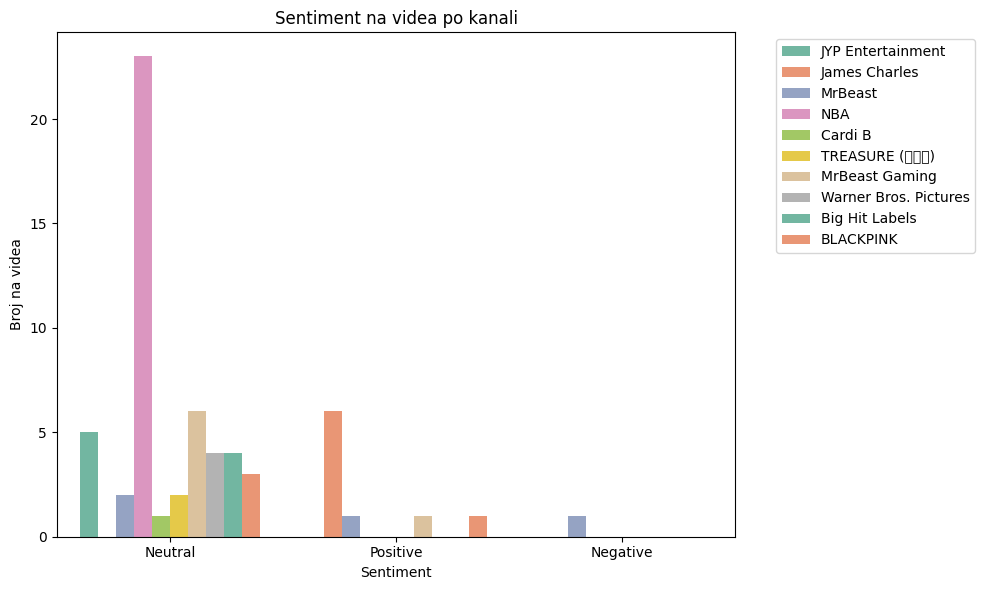

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=top_10_channel_videos, x='sentiment', hue='channelTitle', palette='Set2')
plt.title("Sentiment na videa po kanali")
plt.xlabel("Sentiment")
plt.ylabel("Broj na videa")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Performance analysis**

<ipython-input-26-867002618>:25: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-867002618>:25: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-26-867002618>:25: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byte

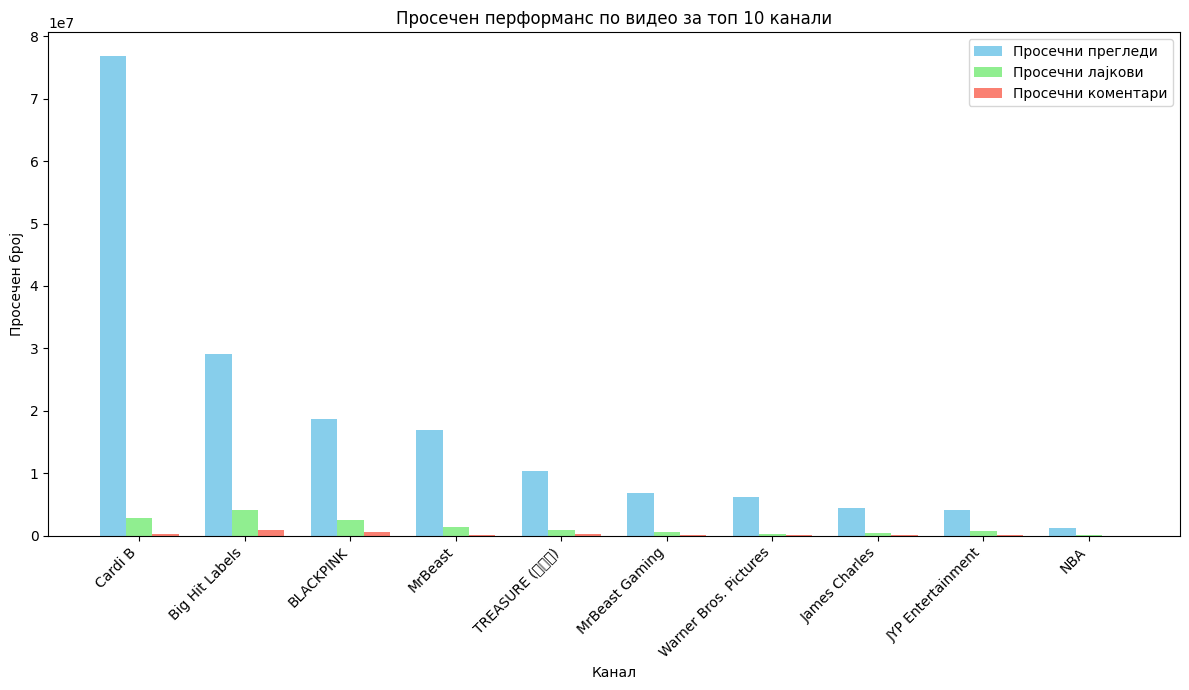

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

channel_perf = top_10_channel_videos.groupby('channelTitle').agg({
    'view_count': 'mean',
    'likes': 'mean',
    'comment_count': 'mean'
}).reset_index()

top_channels = channel_perf.sort_values('view_count', ascending=False).head(10)

plt.figure(figsize=(12,7))
bar_width = 0.25
x = range(len(top_channels))

plt.bar(x, top_channels['view_count'], width=bar_width, label='Prosecni pregledi', color='skyblue')
plt.bar([p + bar_width for p in x], top_channels['likes'], width=bar_width, label='Prosecni lajkovi', color='lightgreen')
plt.bar([p + 2*bar_width for p in x], top_channels['comment_count'], width=bar_width, label='Prosecni komentari', color='salmon')

plt.xticks([p + bar_width for p in x], top_channels['channelTitle'], rotation=45, ha='right')
plt.title('Prosecen performans po video')
plt.xlabel('Kanal')
plt.ylabel('Prosecen broj')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-27-2054044679>:16: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-2054044679>:16: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-2054044679>:16: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(b

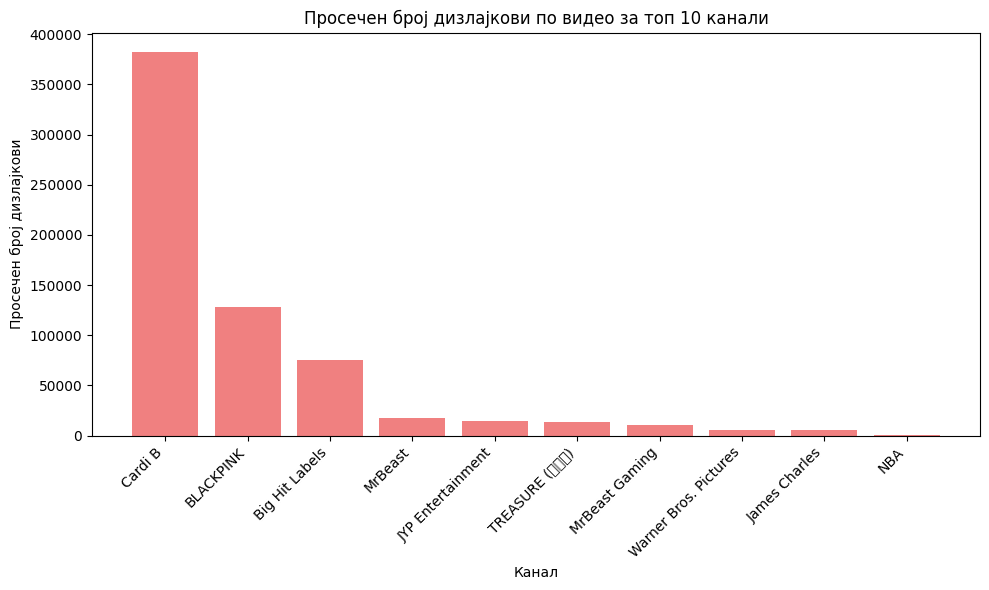

In [ ]:
import matplotlib.pyplot as plt
dislikes_perf = top_10_channel_videos.groupby('channelTitle')['dislikes'].mean().reset_index()
top_dislikes = dislikes_perf.sort_values('dislikes', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_dislikes['channelTitle'], top_dislikes['dislikes'], color='lightcoral')
plt.xticks(rotation=45, ha='right')
plt.title('Prosecen broj na dislajkovi po video')
plt.xlabel('Kanal')
plt.ylabel('Prosecen broj dislajkovi')
plt.tight_layout()
plt.show()